In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import linear_model, datasets
from sklearn.linear_model import Lasso
%matplotlib inline

In [28]:
#removing values where gene-id is 0 (unidentified)
data = pd.read_csv('ExpressionR50.csv', header =None)
rows = pd.read_csv('RowsR50.csv')
age = np.array([12, 13, 13, 12, 16, 17, 21, 21, 24, 35, 37])
gene_id = rows.ix[:,2]
data_id = pd.concat([data, gene_id], axis=1)
new_data = data_id[data_id['gene-id']!= 0]
clean_data = new_data.ix[:,:-1]

In [29]:
just_data = new_data.ix[:,:11].values

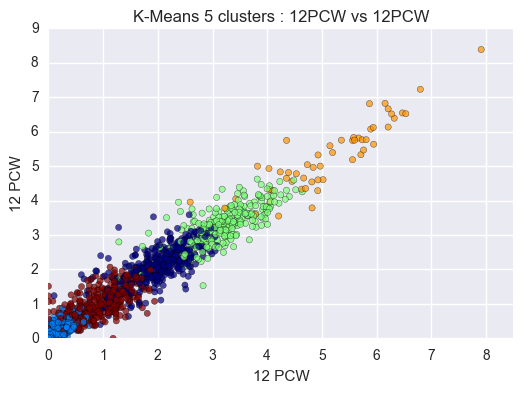

In [30]:
km = KMeans(n_clusters = 5)
km.fit(just_data)

group = km.labels_

plt.scatter(just_data[:,0],just_data[:,3],
            alpha=0.7, c=group, cmap='jet')
plt.xlim([0,8.5])
plt.ylim([0,9])
plt.title('K-Means 5 clusters : 12PCW vs 12PCW')
plt.xlabel("12 PCW")
plt.ylabel("12 PCW")

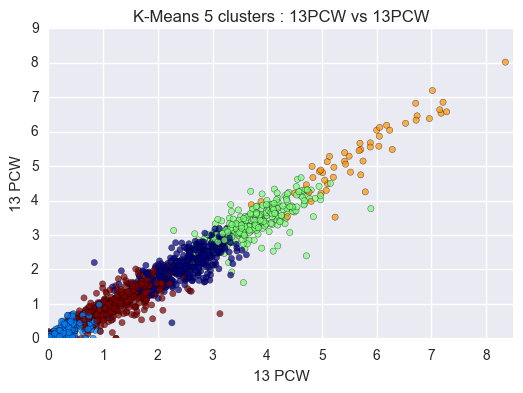

In [32]:
km = KMeans(n_clusters = 5)
km.fit(just_data)

group1 = km.labels_

plt.scatter(just_data[:,1],just_data[:,2],
            alpha=0.7, c=group, cmap='jet')

plt.xlim([0,8.5])
plt.ylim([0,9])
plt.title('K-Means 5 clusters : 13PCW vs 13PCW')
plt.xlabel("13 PCW")
plt.ylabel("13 PCW")

In [33]:
pd.DataFrame(just_data[:,:]).head()
Predict = pd.DataFrame(group1)

In [64]:
hi= np.column_stack((new_data.iloc[:,:], Predict))
bye = pd.DataFrame(hi[:,:])
cluster1 = bye[bye.iloc[:,-1]== 1]
cluster1

,0,1,2,3,4,5,6,7,8,9,10,11,12
16,0.4916,0.7352,0.2237,0.6242,0.4246,1.5120,1.4565,1.1810,1.5891,0.7958,0.8471,123953.0,1.0
18,1.0059,0.9573,0.8402,1.3203,0.7185,2.2762,2.6442,2.3275,2.5435,1.9148,1.9870,2235.0,1.0
21,0.6767,1.3290,1.1910,0.7283,0.7048,1.5321,2.5966,1.6216,1.5615,1.2935,1.7996,6517.0,1.0
22,0.4394,1.0251,0.3953,0.2718,0.3251,1.1545,1.7917,1.1379,1.6447,0.2439,1.2877,1014768.0,1.0
24,0.4797,0.8774,0.3567,0.5862,0.6341,1.3292,1.3809,1.4967,1.9785,1.3024,1.8790,303.0,1.0
26,0.5928,1.3670,1.1986,0.9243,0.6549,1.7762,1.8276,1.9069,1.3983,1.3139,1.4578,94701.0,1.0
27,1.2750,2.0826,1.7442,1.6283,0.7212,2.1909,2.3420,2.4796,1.9306,1.9970,1.8093,79856.0,1.0
29,0.0805,1.6000,0.9108,1.0784,0.0526,1.6308,1.9126,2.0066,1.0788,1.6340,1.3983,9478.0,1.0
31,0.4693,1.0972,0.7191,0.6948,0.5509,1.5740,1.4617,1.0963,1.1685,1.0172,1.7457,133671.0,1.0
34,0.3971,0.4817,0.3709,0.4085,0.2614,1.0858,1.9240,1.3198,1.1665,0.8515,1.0526,41735.0,1.0


In [55]:
Data_Predict = np.column_stack((new_data.iloc[:,11:13], Predict))
GeneID_Predict = pd.DataFrame(Data_Predict[:,:])
GeneID_Predict.head()

,0,1
0,30786,2
1,865,3
2,34129,2
3,81016,2
4,34829,2


In [35]:
cluster0 = GeneID_Predict[GeneID_Predict[1]== 0]
cluster1 = GeneID_Predict[GeneID_Predict[1]== 1]
cluster2 = GeneID_Predict[GeneID_Predict[1]== 2]
cluster3 = GeneID_Predict[GeneID_Predict[1]== 3]
cluster4 = GeneID_Predict[GeneID_Predict[1]== 4]

In [36]:
Cluster0_genes = cluster0.iloc[:,0:1].values
Cluster1_genes = cluster1.iloc[:,0:1].values
Cluster2_genes = cluster2.iloc[:,0:1].values
Cluster3_genes = cluster3.iloc[:,0:1].values
Cluster4_genes = cluster4.iloc[:,0:1].values

In [37]:
Cluster0_genes.size

266

In [38]:
Cluster1_genes.size

388

In [39]:
Cluster2_genes.size

374

In [40]:
Cluster3_genes.size

53

In [41]:
Cluster4_genes.size

516

In [46]:
Cluster4_genes

array([[   171002],
       [    80267],
       [     7591],
       [    26035],
       [     8766],
       [157121039],
       [   119464],
       [    30548],
       [    78672],
       [     6714],
       [    80880],
       [   110163],
       [    23378],
       [    30682],
       [     5963],
       [     5219],
       [    94090],
       [   125558],
       [157120623],
       [    29576],
       [      914],
       [     5256],
       [   169497],
       [    81032],
       [   133999],
       [     2979],
       [    56478],
       [    79707],
       [     2630],
       [     3798],
       [    78576],
       [    94762],
       [     4033],
       [     2548],
       [157122593],
       [     1351],
       [     7781],
       [    85719],
       [   119803],
       [157123077],
       [    94402],
       [     1579],
       [    31205],
       [     6715],
       [   166713],
       [    85600],
       [    94022],
       [     4812],
       [    93997],
       [    80502],


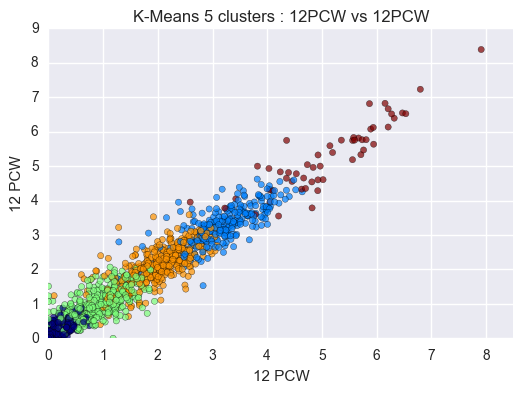

In [26]:
km = KMeans(n_clusters = 5)
km.fit(just_data)

group = km.labels_

plt.scatter(just_data[:,0],just_data[:,3],
            alpha=0.7, c=group, cmap='jet')
plt.xlim([0,8.5])
plt.ylim([0,9])
plt.title('K-Means 5 clusters : 12PCW vs 12PCW')
plt.xlabel("12 PCW")
plt.ylabel("12 PCW")

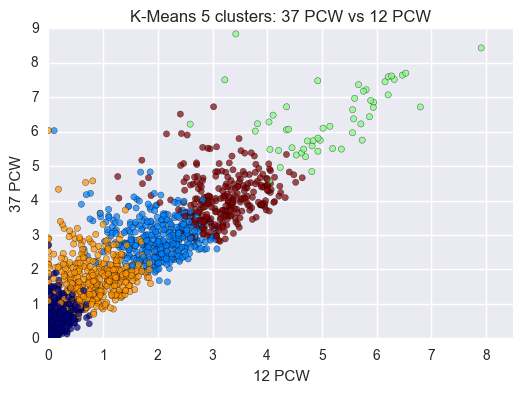

In [25]:
km = KMeans(n_clusters = 5)
km.fit(just_data)

group = km.labels_

plt.scatter(just_data[:,0],just_data[:,-1],
            alpha=0.7, c=group, cmap='jet')
plt.xlim([0,8.5])
plt.ylim([0,9])
plt.xlabel("12 PCW")
plt.ylabel("37 PCW")
plt.title("K-Means 5 clusters: 37 PCW vs 12 PCW")

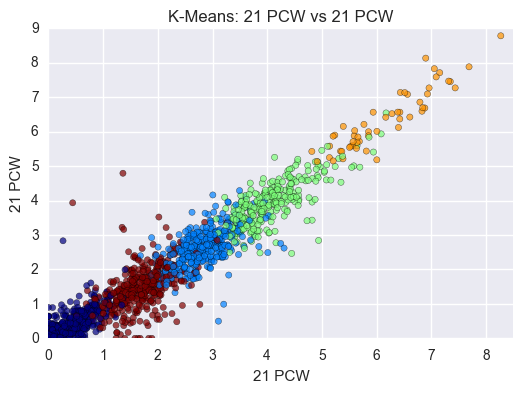

In [15]:
km = KMeans(n_clusters = 5)
km.fit(just_data)

group = km.labels_

plt.scatter(just_data[:,7],just_data[:,8],
            alpha=0.7, c=group, cmap='jet')

plt.xlim([0,8.5])
plt.ylim([0,9])
plt.xlabel("21 PCW")
plt.ylabel("21 PCW")
plt.title("K-Means: 21 PCW vs 21 PCW")

In [16]:
just_data.shape

(1597, 11)

In [17]:
just_dataT = just_data.T

In [18]:
just_dataT.shape

(11, 1597)

Lasso Regression: [ 0.38233716]
Lasso Intercept: [ 5.86582343]


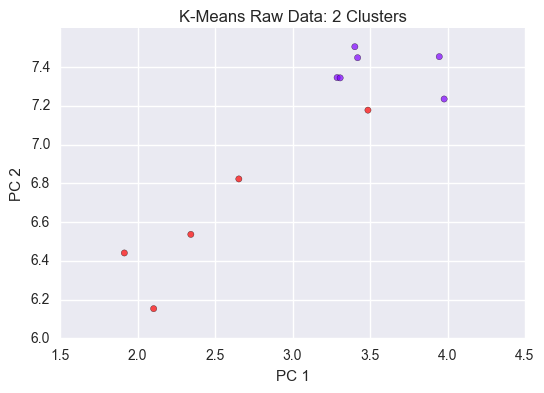

In [19]:
km = KMeans(n_clusters = 2)
km.fit(just_dataT)

group = km.labels_

plt.scatter(just_dataT[:,0],just_dataT[:,1],
            alpha=0.7, c=group, cmap='rainbow')

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("K-Means Raw Data: 2 Clusters")

clf = linear_model.Lasso(alpha=0.1)
clf.fit(just_dataT[:,0].reshape(-1,1),just_dataT[:,1].reshape(-1,1))

print('Lasso Regression:', clf.coef_)
print('Lasso Intercept:', clf.intercept_)

Lasso Regression: [ 5.89349938]
Lasso Intercept: 1.95832598343


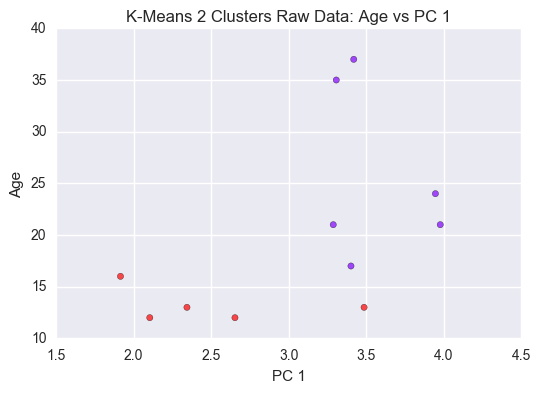

In [20]:
km = KMeans(n_clusters = 2)
km.fit(just_dataT)

group = km.labels_

plt.scatter(just_dataT[:,0],age,
            alpha=0.7, c=group, cmap='rainbow')

plt.xlabel("PC 1")
plt.ylabel("Age")
plt.title("K-Means 2 Clusters Raw Data: Age vs PC 1")

clf = linear_model.Lasso(alpha=0.1)
clf.fit(just_dataT[:,0].reshape(-1,1), age)

print('Lasso Regression:', clf.coef_)
print('Lasso Intercept:', clf.intercept_)

In [21]:
just_dataT[:,0]

array([ 2.1039,  3.4865,  2.3438,  2.6535,  1.9149,  3.4019,  3.978 ,
        3.2876,  3.9467,  3.3072,  3.4198])